In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy import stats
import warnings
from sklearn.preprocessing import LabelEncoder, RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
import sklearn.linear_model as linear_model
from sklearn.metrics import make_scorer, r2_score
from sklearn.svm import SVR
import xgboost
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Merged_data.csv')
df

,Model,Year,Mileage,Brand,Color,Body Type,Fuel Type,Seating Capacity,Seller Address,Seller Region,Price
0,HR-V,2018,42500,Honda,Grey,SUV,Pertamax,5,Bekasi,Jawa Barat,243000000
1,Yaris,2021,37500,Toyota,Red,Hatchback,Pertamax,5,Bogor,Jawa Barat,254000000
2,Ertiga,2017,112500,Suzuki,Black,MPV,Pertamax,7,Depok,Jawa Barat,153000000
3,March,2016,72500,Nissan,Black,Hatchback,Pertamax,5,Depok,Jawa Barat,104000000
4,GO+,2014,97500,Datsun,Silver,MPV,Pertamax,7,Depok,Jawa Barat,74000000
...,...,...,...,...,...,...,...,...,...,...,...
32361,Pajero Sport,2016,57500,Mitsubishi,White,SUV,Solar,7,Surabaya,Jawa Timur,410000000
32362,X1,2019,17500,BMW,White,SUV,Pertamax,5,Surabaya,Jawa Timur,615000000
32363,Luxio,2014,41000,Daihatsu,Silver,MPV,Pertamax,8,Malang,Jawa Timur,197500000
32364,X5,2019,27500,BMW,White,SUV,Pertamax,5,Surabaya,Jawa Timur,1339000000


In [3]:
df.describe()

,Year,Mileage,Seating Capacity,Price
count,32366.000000,32366.000000,32366.000000,3.236600e+04
mean,2020.773497,18347.716863,6.003460,5.832561e+08
std,4.074103,37031.638820,1.472269,8.842715e+08
min,1975.000000,0.000000,2.000000,1.530000e+07
25%,2019.000000,0.000000,5.000000,2.240000e+08
50%,2023.000000,0.000000,7.000000,3.292900e+08
75%,2023.000000,22500.000000,7.000000,6.300000e+08
max,2023.000000,999999.000000,22.000000,1.900000e+10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32366 entries, 0 to 32365
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Model             32366 non-null  object
 1   Year              32366 non-null  int64 
 2   Mileage           32366 non-null  int64 
 3   Brand             32366 non-null  object
 4   Color             32366 non-null  object
 5   Body Type         32345 non-null  object
 6   Fuel Type         32340 non-null  object
 7   Seating Capacity  32366 non-null  int64 
 8   Seller Address    32366 non-null  object
 9   Seller Region     32366 non-null  object
 10  Price             32366 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 2.7+ MB


In [5]:
df.isna().any()

Model               False
Year                False
Mileage             False
Brand               False
Color               False
Body Type            True
Fuel Type            True
Seating Capacity    False
Seller Address      False
Seller Region       False
Price               False
dtype: bool

In [6]:
df.isnull().sum()

Model                0
Year                 0
Mileage              0
Brand                0
Color                0
Body Type           21
Fuel Type           26
Seating Capacity     0
Seller Address       0
Seller Region        0
Price                0
dtype: int64

In [7]:
def percent_missing(df):
    percent_nan = 100 * df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan > 0].sort_values()
    
    return percent_nan

In [8]:
percent_nan = percent_missing(df)
percent_nan

Body Type    0.064883
Fuel Type    0.080331
dtype: float64

In [9]:
df[df['Body Type'].isnull()]

,Model,Year,Mileage,Brand,Color,Body Type,Fuel Type,Seating Capacity,Seller Address,Seller Region,Price
6162,Yaris,2012,92500,Toyota,Black,NaN,Petrol - Unleaded,5,Bekasi,Jawa Barat,115000000
6221,Corolla Altis,2004,191545,Toyota,Silver,NaN,Petrol - Unleaded,5,Bogor,Jawa Barat,95000000
6234,Yaris,2013,87500,Toyota,Blue,NaN,Petrol - Unleaded,5,Bandung,Jawa Barat,115000000
6312,Yaris,2012,182500,Toyota,Red,NaN,Petrol - Unleaded,5,Bekasi,Jawa Barat,110000000
6676,Corolla Altis,2004,227500,Toyota,Black,NaN,Petrol - Unleaded,5,Bekasi,Jawa Barat,80000000
6703,Yaris,2013,122500,Toyota,White,NaN,Petrol - Unleaded,5,Bandung,Jawa Barat,129000000
7545,Odyssey,2014,52500,Honda,Black,NaN,Petrol - Unleaded,7,Jakarta Selatan,DKI Jakarta,279000000
10308,A6,2014,92500,Audi,Grey,NaN,Petrol - Unleaded,5,Jakarta Selatan,DKI Jakarta,249000000
26835,Yaris,2009,145882,Toyota,Grey,NaN,Petrol - Unleaded,5,Jakarta Selatan,DKI Jakarta,95000000
27208,Outlander Sport,2013,102500,Mitsubishi,White,NaN,Petrol - Unleaded,5,Jakarta Selatan,DKI Jakarta,174000000


In [10]:
df[df['Fuel Type'].isnull()]

,Model,Year,Mileage,Brand,Color,Body Type,Fuel Type,Seating Capacity,Seller Address,Seller Region,Price
7194,IONIQ 5,2022,0,Hyundai,White,Wagon,NaN,5,Bekasi,Jawa Barat,718000000
7195,IONIQ 5,2022,0,Hyundai,White,Wagon,NaN,5,Bekasi,Jawa Barat,718000000
7200,IONIQ 5,2022,0,Hyundai,White,Wagon,NaN,5,Bekasi,Jawa Barat,718000000
7206,IONIQ 5,2022,0,Hyundai,White,Wagon,NaN,5,Bekasi,Jawa Barat,718000000
7207,IONIQ 5,2022,0,Hyundai,White,Wagon,NaN,5,Bekasi,Jawa Barat,718000000
7212,IONIQ 5,2022,0,Hyundai,White,Wagon,NaN,5,Bekasi,Jawa Barat,718000000
7213,IONIQ 5,2022,0,Hyundai,White,Wagon,NaN,5,Bekasi,Jawa Barat,718000000
7214,IONIQ 5,2022,0,Hyundai,White,Wagon,NaN,5,Bekasi,Jawa Barat,718000000
7215,IONIQ 5,2022,0,Hyundai,White,Wagon,NaN,5,Bekasi,Jawa Barat,718000000
7218,IONIQ 5,2022,0,Hyundai,White,Wagon,NaN,5,Bekasi,Jawa Barat,718000000


In [11]:
df = df.dropna(axis=0,subset=['Body Type','Fuel Type'])

In [12]:
df = df.reset_index(drop=True)

In [13]:
df['Fuel Type'].value_counts()

Pertamax    26602
Solar        4688
Electric     1013
Diesel         11
Premium         3
CNG             2
Name: Fuel Type, dtype: int64

<AxesSubplot: xlabel='Price', ylabel='Count'>

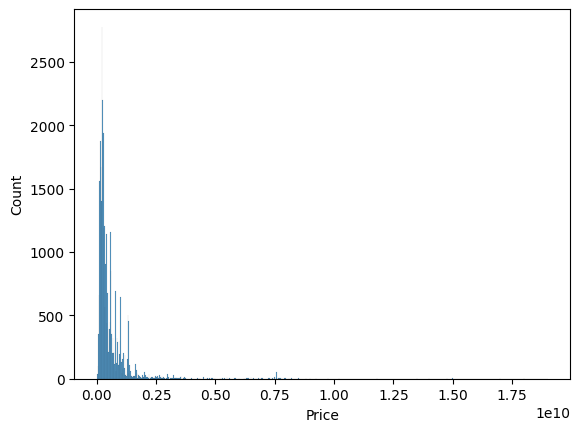

In [14]:
sns.histplot(df['Price'])

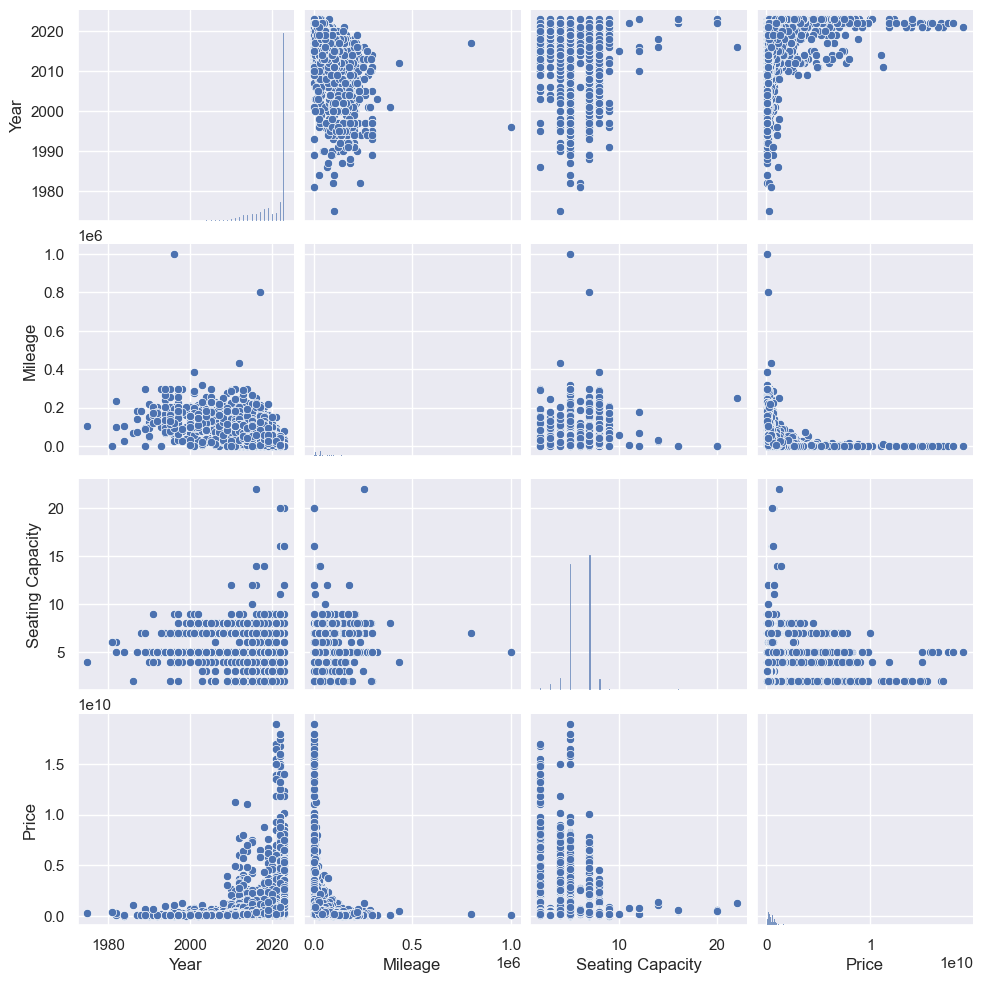

In [15]:
sns.set()
sns.pairplot(df, size=2.5)
plt.show()

In [16]:
df.columns

Index(['Model', 'Year', 'Mileage', 'Brand', 'Color', 'Body Type', 'Fuel Type',
       'Seating Capacity', 'Seller Address', 'Seller Region', 'Price'],
      dtype='object')

In [17]:
cat_cols = ['Model','Brand','Color','Body Type','Fuel Type','Seller Address','Seller Region']
num_cols = ['Year','Mileage','Seating Capacity','Price']

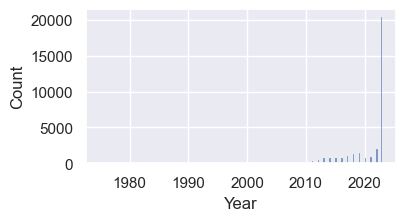

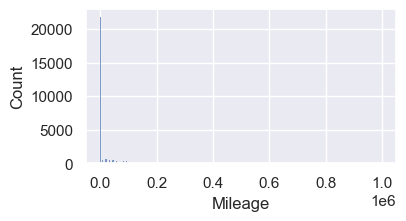

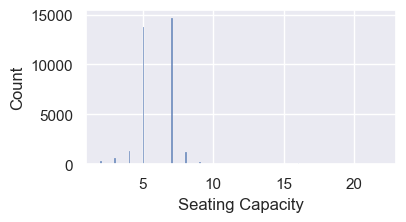

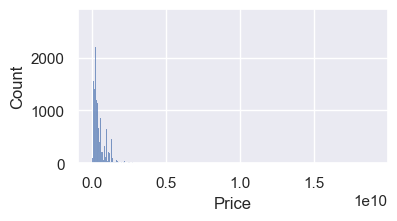

In [18]:
for i in num_cols:
    plt.figure(figsize=(4,2))
    sns.histplot(data=df,x=i)

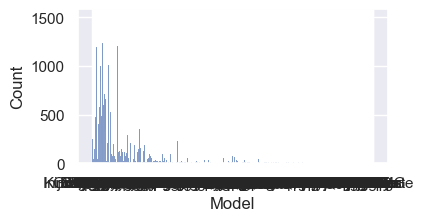

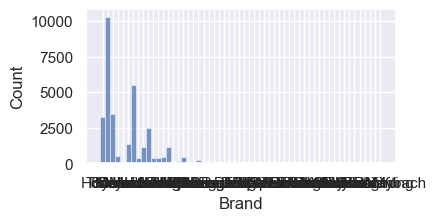

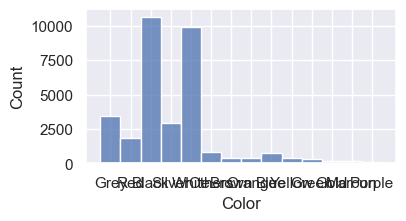

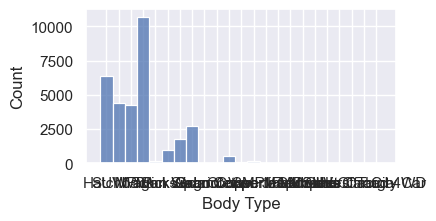

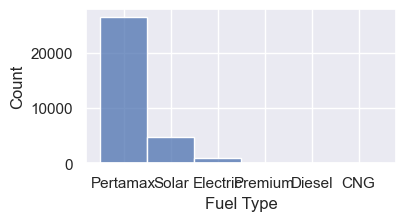

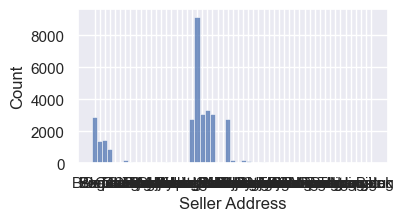

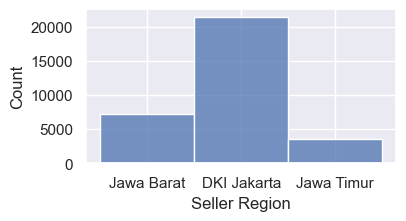

In [19]:
for i in cat_cols:
    plt.figure(figsize=(4,2))
    sns.histplot(data=df,x=i)

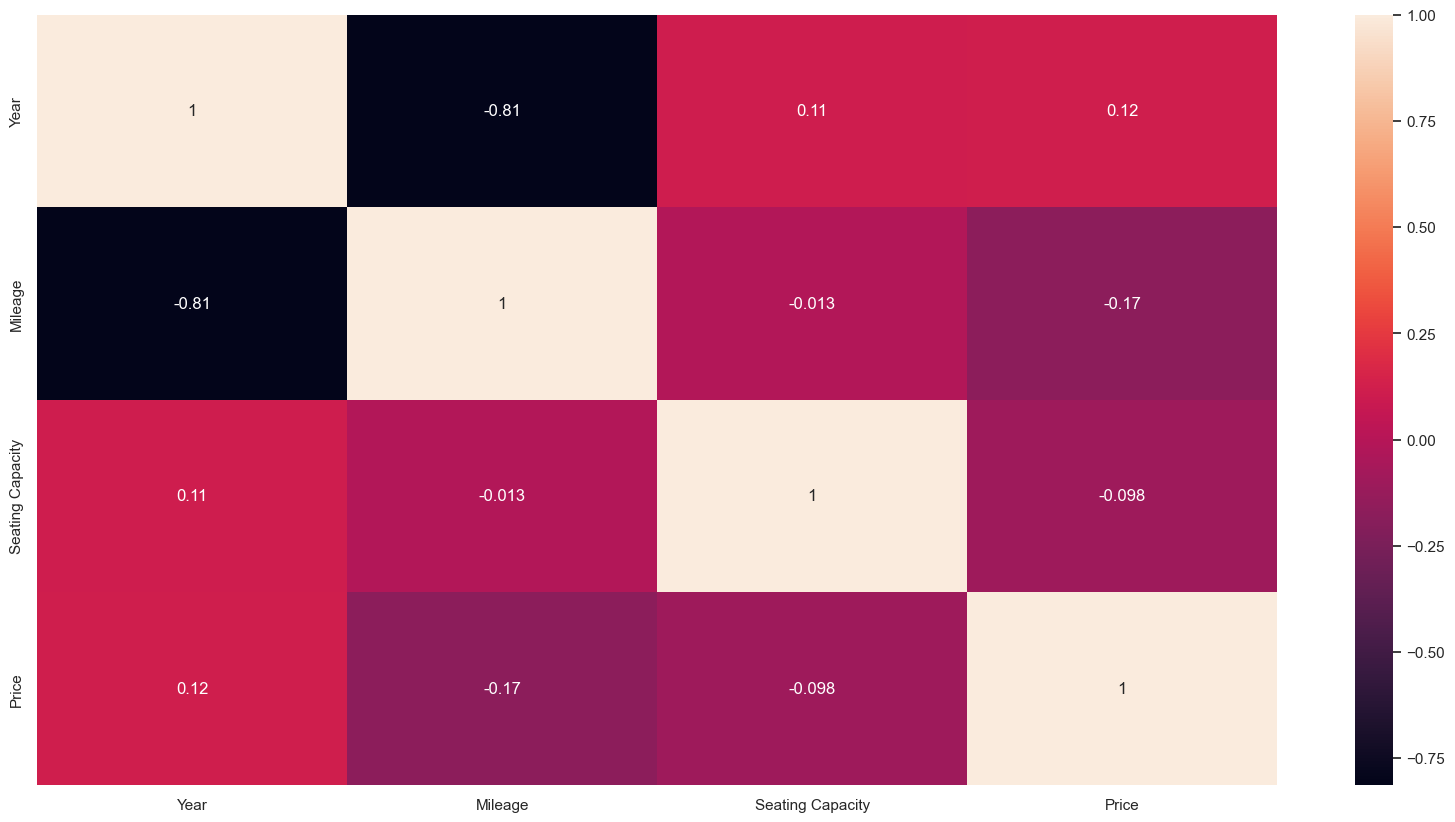

In [20]:
plt.figure(figsize=(20,10))
df.corr()
sns.heatmap(df.corr(), annot=True)
plt.show()

In [21]:
df['Brand'].unique()

array(['Honda', 'Toyota', 'Suzuki', 'Nissan', 'Datsun', 'Daihatsu',
       'Hyundai', 'Isuzu', 'Mitsubishi', 'Mercedes-Benz', 'Mazda',
       'Wuling', 'Chery', 'BMW', 'Audi', 'Land Rover', 'MINI', 'KIA',
       'Volkswagen', 'Lexus', 'Maserati', 'Chevrolet', 'Ford', 'Peugeot',
       'Jaguar', 'Porsche', 'DFSK', 'Jeep', 'Dodge', 'Tata', 'Proton',
       'Volvo', 'Opel', 'MG', 'Subaru', 'UD TRUCKS', 'Hino', 'Renault',
       'Tesla', 'smart', 'Lamborghini', 'Ferrari', 'Genesis', 'Bentley',
       'Rolls-Royce', 'GMC', 'Ineos', 'Aston Martin', 'Cadillac',
       'Hummer', 'Fiat', 'Mercedes-Maybach', 'McLaren', 'RAM',
       'SsangYong', 'Infiniti'], dtype=object)

In [22]:
tmp_data = df.copy()

In [23]:
tmp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32319 entries, 0 to 32318
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Model             32319 non-null  object
 1   Year              32319 non-null  int64 
 2   Mileage           32319 non-null  int64 
 3   Brand             32319 non-null  object
 4   Color             32319 non-null  object
 5   Body Type         32319 non-null  object
 6   Fuel Type         32319 non-null  object
 7   Seating Capacity  32319 non-null  int64 
 8   Seller Address    32319 non-null  object
 9   Seller Region     32319 non-null  object
 10  Price             32319 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 2.7+ MB


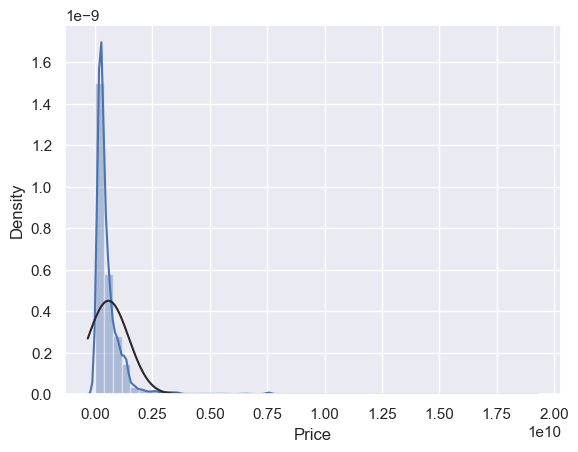

In [24]:
sns.distplot(tmp_data['Price'], fit = norm)
plt.show()

<AxesSubplot: xlabel='Price', ylabel='Density'>

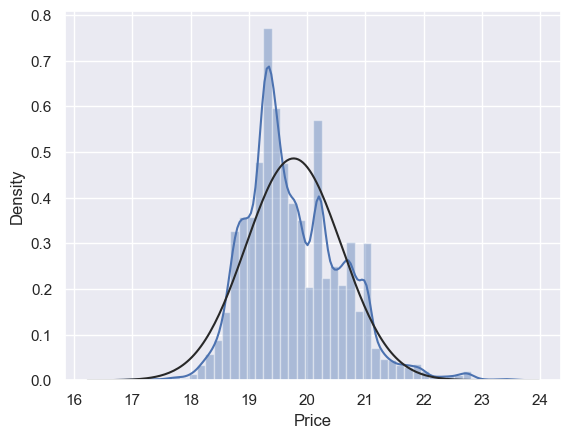

In [25]:
tmp_data['Price'] = np.log(tmp_data['Price'])
sns.distplot(tmp_data['Price'], fit = norm)

<AxesSubplot: xlabel='Mileage', ylabel='Density'>

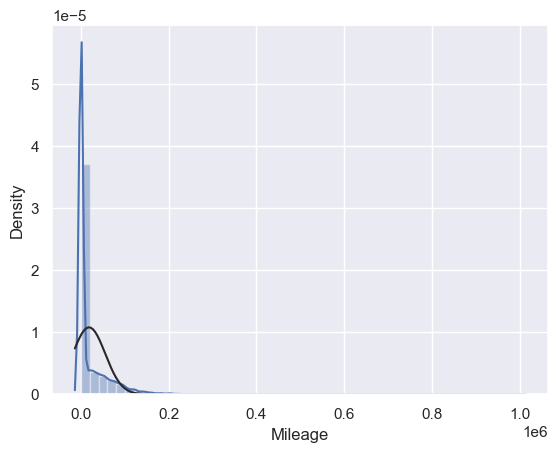

In [26]:
sns.distplot(tmp_data['Mileage'], fit = norm)

In [27]:
tmp_data['Mileage'] = np.log(tmp_data['Mileage'])

In [28]:
tmp_data = tmp_data.drop(['Color','Seller Address','Seller Region','Model'], axis=1)
tmp_data

,Year,Mileage,Brand,Body Type,Fuel Type,Seating Capacity,Price
0,2018,10.657259,Honda,SUV,Pertamax,5,19.308572
1,2021,10.532096,Toyota,Hatchback,Pertamax,5,19.352845
2,2017,11.630709,Suzuki,MPV,Pertamax,7,18.845948
3,2016,11.191342,Nissan,Hatchback,Pertamax,5,18.459901
4,2014,11.487608,Datsun,MPV,Pertamax,7,18.119576
...,...,...,...,...,...,...,...
32314,2016,10.959540,Mitsubishi,SUV,Solar,7,19.831668
32315,2019,9.769956,BMW,SUV,Pertamax,5,20.237133
32316,2014,10.621327,Daihatsu,MPV,Pertamax,8,19.101249
32317,2019,10.221941,BMW,SUV,Pertamax,5,21.015189


In [29]:
tmp_data['Current Year'] = 2023
tmp_data['Age of Car']=tmp_data['Current Year']-tmp_data['Year']
tmp_data.drop('Current Year',axis=1,inplace=True)

In [30]:
tmp_data

,Year,Mileage,Brand,Body Type,Fuel Type,Seating Capacity,Price,Age of Car
0,2018,10.657259,Honda,SUV,Pertamax,5,19.308572,5
1,2021,10.532096,Toyota,Hatchback,Pertamax,5,19.352845,2
2,2017,11.630709,Suzuki,MPV,Pertamax,7,18.845948,6
3,2016,11.191342,Nissan,Hatchback,Pertamax,5,18.459901,7
4,2014,11.487608,Datsun,MPV,Pertamax,7,18.119576,9
...,...,...,...,...,...,...,...,...
32314,2016,10.959540,Mitsubishi,SUV,Solar,7,19.831668,7
32315,2019,9.769956,BMW,SUV,Pertamax,5,20.237133,4
32316,2014,10.621327,Daihatsu,MPV,Pertamax,8,19.101249,9
32317,2019,10.221941,BMW,SUV,Pertamax,5,21.015189,4


In [31]:
tmp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32319 entries, 0 to 32318
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              32319 non-null  int64  
 1   Mileage           32319 non-null  float64
 2   Brand             32319 non-null  object 
 3   Body Type         32319 non-null  object 
 4   Fuel Type         32319 non-null  object 
 5   Seating Capacity  32319 non-null  int64  
 6   Price             32319 non-null  float64
 7   Age of Car        32319 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 2.0+ MB


In [32]:
tmp_data['Brand'] = tmp_data['Brand'].astype('category')
tmp_data['Body Type'] = tmp_data['Body Type'].astype('category')
tmp_data['Fuel Type'] = tmp_data['Fuel Type'].astype('category')

In [33]:
tmp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32319 entries, 0 to 32318
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Year              32319 non-null  int64   
 1   Mileage           32319 non-null  float64 
 2   Brand             32319 non-null  category
 3   Body Type         32319 non-null  category
 4   Fuel Type         32319 non-null  category
 5   Seating Capacity  32319 non-null  int64   
 6   Price             32319 non-null  float64 
 7   Age of Car        32319 non-null  int64   
dtypes: category(3), float64(2), int64(3)
memory usage: 1.3 MB


In [35]:
tmp_data.drop('Year',axis=1,inplace=True)

In [36]:
tmp_data

,Mileage,Brand,Body Type,Fuel Type,Seating Capacity,Price,Age of Car
0,10.657259,Honda,SUV,Pertamax,5,19.308572,5
1,10.532096,Toyota,Hatchback,Pertamax,5,19.352845,2
2,11.630709,Suzuki,MPV,Pertamax,7,18.845948,6
3,11.191342,Nissan,Hatchback,Pertamax,5,18.459901,7
4,11.487608,Datsun,MPV,Pertamax,7,18.119576,9
...,...,...,...,...,...,...,...
32314,10.959540,Mitsubishi,SUV,Solar,7,19.831668,7
32315,9.769956,BMW,SUV,Pertamax,5,20.237133,4
32316,10.621327,Daihatsu,MPV,Pertamax,8,19.101249,9
32317,10.221941,BMW,SUV,Pertamax,5,21.015189,4


In [37]:
X = tmp_data.drop('Price',axis=1)
y = tmp_data['Price']

In [38]:
cols = ('Brand','Body Type','Fuel Type','Seating Capacity')
encoders = {}

for i in cols:
    lbl = LabelEncoder()
    lbl.fit(list(X[i].values))
    X[i] = lbl.transform(list(X[i].values))
    encoders[i] = lbl
    
print('Shape X: {}'.format(X.shape))

Shape X: (32319, 6)


In [39]:
X

,Mileage,Brand,Body Type,Fuel Type,Seating Capacity,Age of Car
0,10.657259,17,14,3,3,5
1,10.532096,50,7,3,3,2
2,11.630709,47,9,3,5,6
3,11.191342,37,7,3,3,7
4,11.487608,9,9,3,5,9
...,...,...,...,...,...,...
32314,10.959540,36,14,5,5,7
32315,9.769956,2,14,3,3,4
32316,10.621327,8,9,3,6,9
32317,10.221941,2,14,3,3,4


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.reset_index()
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

X_train: (25855, 6)
X_test: (6464, 6)
y_train: (25855,)
y_test: (6464,)
